Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


Load datasets

In [2]:
# Replace with your actual file paths or use the attached data
fixtures = pd.read_csv('/content/sample_data/fixtures.csv')
player_possession = pd.read_csv('/content/sample_data/player_possession_stats.csv')
player_salaries = pd.read_csv('/content/sample_data/player_salaries.csv')
player_stats = pd.read_csv('/content/sample_data/player_stats.csv')
standings = pd.read_csv('/content/sample_data/standings.csv')
team_possession = pd.read_csv('/content/sample_data/team_possession_stats.csv')
team_salary = pd.read_csv('/content/sample_data/team_salary.csv')
team_stats = pd.read_csv('/content/sample_data/team_stats.csv')


**Basic Data Inspection**

Check the shape and first few rows:

In [3]:
print("Fixtures shape:", fixtures.shape)
print(fixtures.head())


Fixtures shape: (380, 11)
   week  Day        Date   Time             Home  HomeScore         Away  \
0   1.0  Fri  2024-08-16  20:00   Manchester Utd          1       Fulham   
1   1.0  Sat  2024-08-17  12:30     Ipswich Town          0    Liverpool   
2   1.0  Sat  2024-08-17  15:00    Newcastle Utd          1  Southampton   
3   1.0  Sat  2024-08-17  15:00          Everton          0     Brighton   
4   1.0  Sat  2024-08-17  15:00  Nott'ham Forest          1  Bournemouth   

   AwayScore  Attendance                 Venue         Referee  
0          0     73297.0          Old Trafford    Robert Jones  
1          2     30014.0  Portman Road Stadium    Tim Robinson  
2          0     52196.0        St James' Park    Craig Pawson  
3          3     39217.0         Goodison Park    Simon Hooper  
4          1     29763.0       The City Ground  Michael Oliver  


Check for missing values

In [4]:
print("Fixtures missing values:\n", fixtures.isnull().sum())


Fixtures missing values:
 week          0
Day           0
Date          0
Time          0
Home          0
HomeScore     0
Away          0
AwayScore     0
Attendance    4
Venue         0
Referee       0
dtype: int64


**Descriptive Statistics**

For numerical columns:

In [5]:
print(fixtures.describe())


             week   HomeScore   AwayScore    Attendance
count  380.000000  380.000000  380.000000    376.000000
mean    19.500000    1.513158    1.421053  40431.260638
std     10.980313    1.277917    1.189922  16605.131778
min      1.000000    0.000000    0.000000  11129.000000
25%     10.000000    1.000000    1.000000  29824.250000
50%     19.500000    1.000000    1.000000  38773.500000
75%     29.000000    2.000000    2.000000  56473.750000
max     38.000000    7.000000    6.000000  73839.000000


For categorical columns:

In [6]:
fixtures['Attendance'].fillna(fixtures['Attendance'].median(), inplace=True)

<ipython-input-6-854fb4eba42e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fixtures['Attendance'].fillna(fixtures['Attendance'].median(), inplace=True)


**Feature Engineering (Example: Total Goals)**

Add a column for total goals per match:


In [7]:
fixtures['TotalGoals'] = fixtures['HomeScore'] + fixtures['AwayScore']

**Visualizations**

Histogram of total goals per match

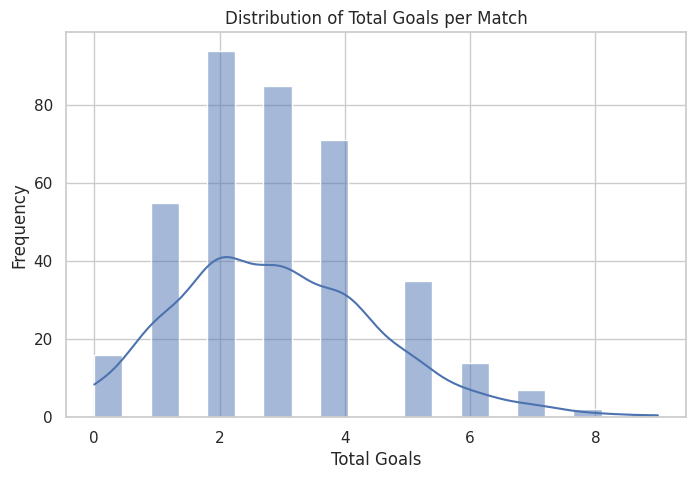

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data=fixtures, x='TotalGoals', bins=20, kde=True)
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

Boxplot of home vs away goals

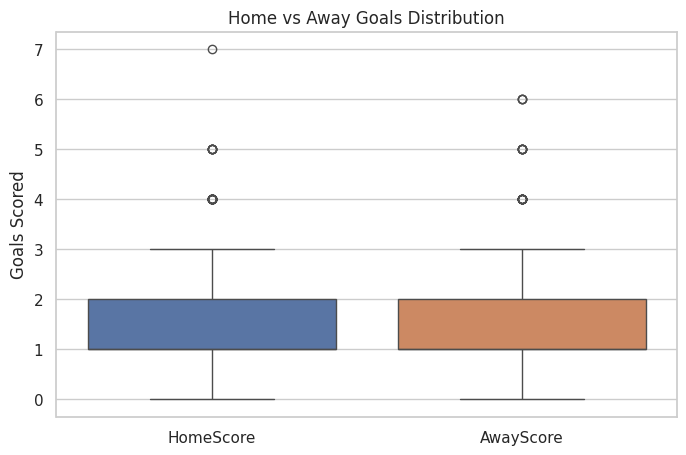

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=fixtures[['HomeScore', 'AwayScore']])
plt.title('Home vs Away Goals Distribution')
plt.ylabel('Goals Scored')
plt.show()

Bar chart of top teams by points (standings)

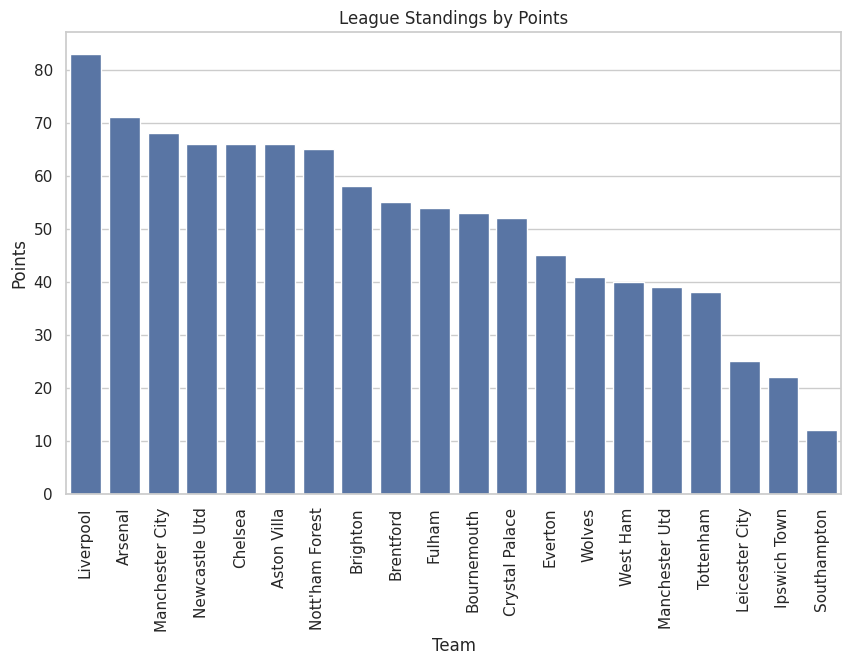

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=standings, x='team', y='points', order=standings.sort_values('points', ascending=False)['team'])
plt.xticks(rotation=90)
plt.title('League Standings by Points')
plt.ylabel('Points')
plt.xlabel('Team')
plt.show()

Scatter plot: Player age vs. weekly salary (player_salaries)

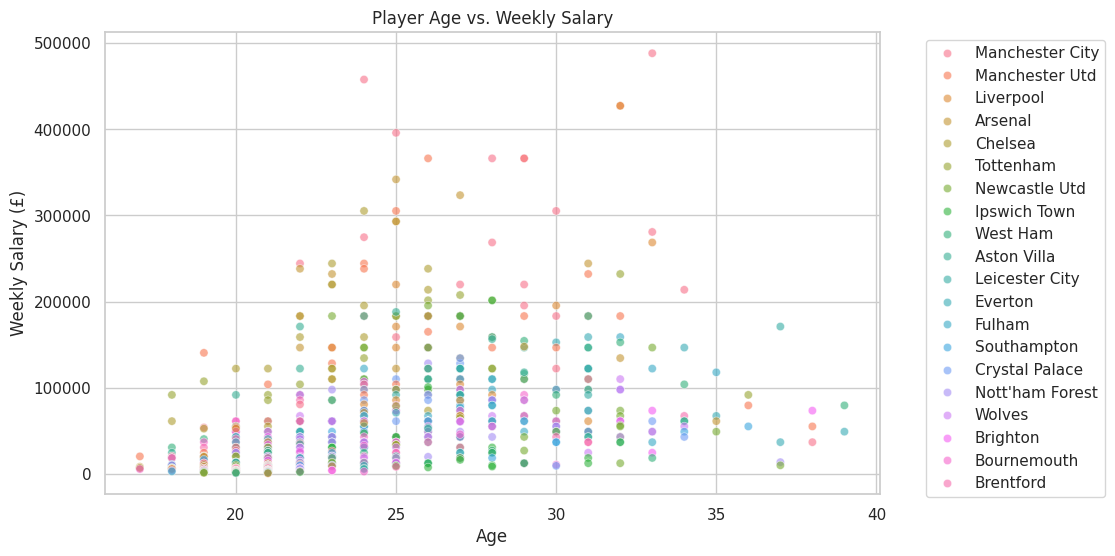

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_salaries, x='Age', y='Weekly', hue='Team', alpha=0.6)
plt.title('Player Age vs. Weekly Salary')
plt.ylabel('Weekly Salary (£)')
plt.xlabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Correlation Analysis**

Correlation heatmap for team stats:

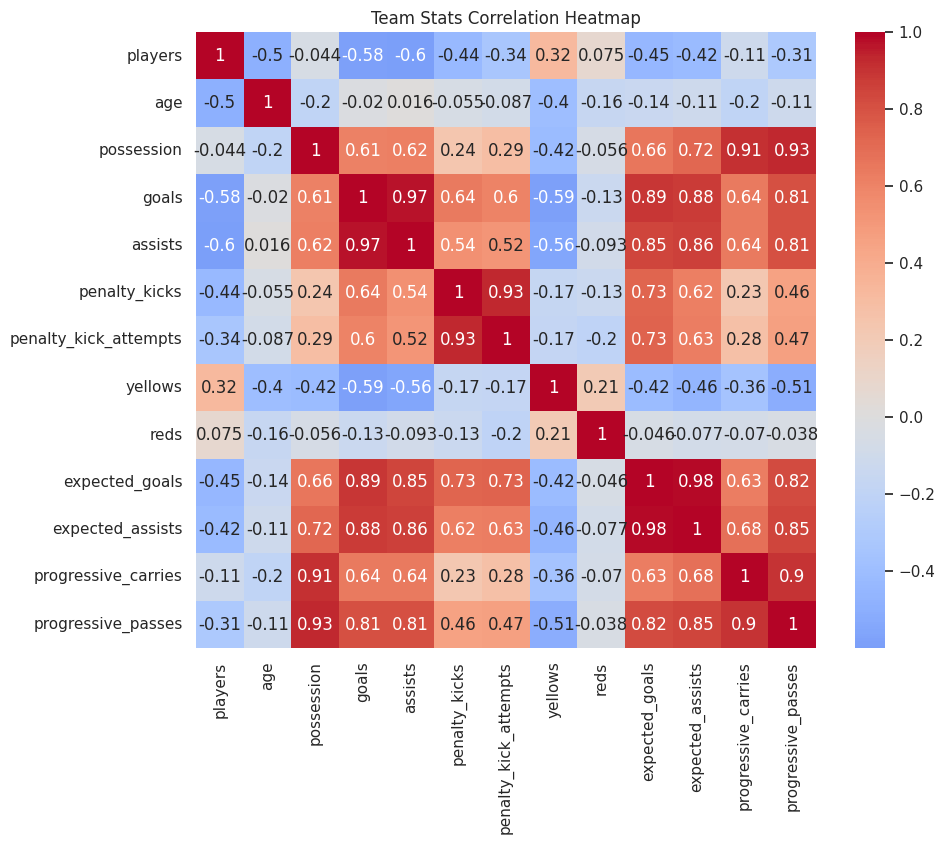

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(team_stats.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Team Stats Correlation Heatmap')
plt.show()

**Merging Data**

Merge player stats and salaries

In [13]:
player_merged = pd.merge(
    player_stats,
    player_salaries,
    left_on=['name', 'team'],
    right_on=['Player', 'Team'],
    how='left'
)
print(player_merged.head())


                name         nation position         team   age    born  \
0         Max Aarons        England       DF  Bournemouth  25.0  2000.0   
1  Joshua Acheampong        England       DF      Chelsea  19.0  2006.0   
2        Tyler Adams  United States       MF  Bournemouth  26.0  1999.0   
3   Tosin Adarabioyo        England       DF      Chelsea  27.0  1997.0   
4      Simon Adingra   Cote dIvoire    FW,MF     Brighton  23.0  2002.0   

   played  starts  minutes  goals  ...  progressive_carries  \
0       3       1       86      0  ...                    1   
1       4       2      170      0  ...                    0   
2      27      20     1875      0  ...                   13   
3      21      14     1319      1  ...                    5   
4      28      11     1052      2  ...                   50   

   progressive_passes  received_progressive_passes            Player  Nation  \
0                   8                            3        Max Aarons     ENG   
1         

**Further Analysis**

Calculate goals per annual salary

In [14]:
player_merged['GoalsPerMillion'] = player_merged['goals'] / (player_merged['Annual'] / 1_000_000)
print(player_merged[['name', 'goals', 'Annual', 'GoalsPerMillion']].sort_values('GoalsPerMillion', ascending=False).head())

                     name  goals     Annual  GoalsPerMillion
457          Kevin Schade     11   635051.0        17.321443
366         Rodrigo Muniz      8   476288.0        16.796560
491  Jørgen Strand Larsen     14   952577.0        14.696975
559           Yoane Wissa     19  1587628.0        11.967539
384         Ethan Nwaneri      4   418845.0         9.550072


**1. Goals/Assists vs. Salary**

Visualization:

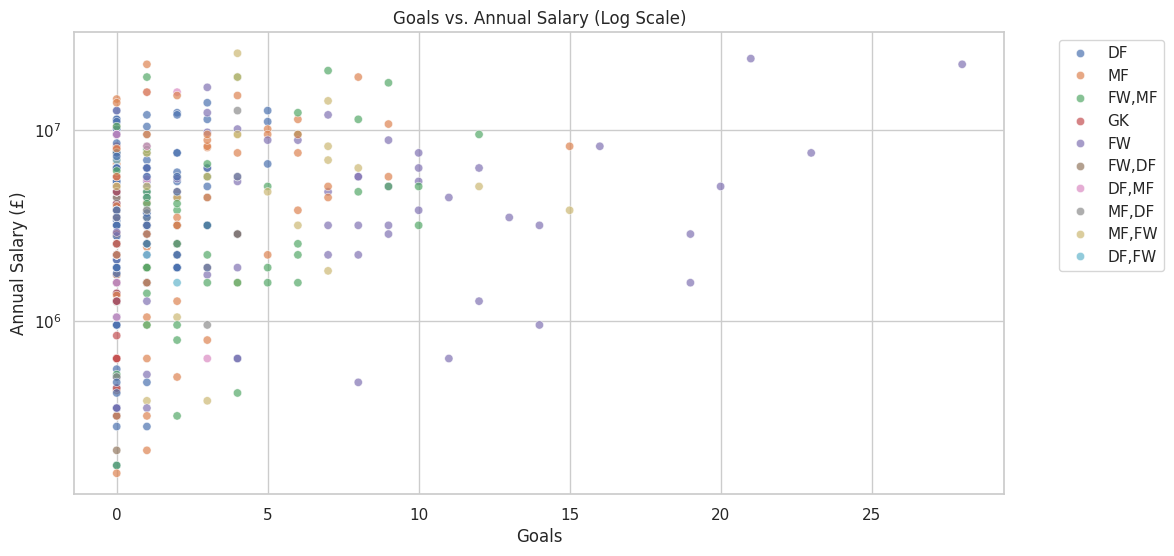

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=player_merged, x='goals', y='Annual', hue='position', alpha=0.7)
plt.yscale('log')  # Salary distribution is heavily skewed
plt.title('Goals vs. Annual Salary (Log Scale)')
plt.xlabel('Goals')
plt.ylabel('Annual Salary (£)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

**Insights:**

    Top earners (>£15M/year) include both high scorers (e.g., Erling Haaland: 24 goals) and non-strikers (e.g., Kevin De Bruyne: 4 goals).

    Forwards dominate the high-salary tier, while defenders/midfielders cluster below £5M/year regardless of goals



**2. Positional Analysis**

Salary by Position:

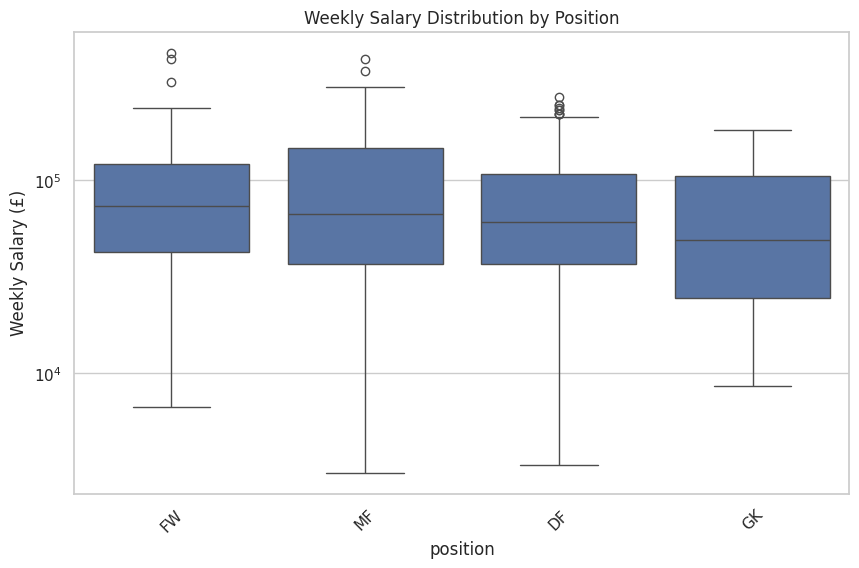

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=player_merged, x='position', y='Weekly', order=['FW', 'MF', 'DF', 'GK'])
plt.title('Weekly Salary Distribution by Position')
plt.xticks(rotation=45)
plt.yscale('log')
plt.ylabel('Weekly Salary (£)')
plt.show()


**3. Efficiency Metrics**

Goals per £1M Salary:

In [21]:
player_merged['GoalsPerMillion'] = player_merged['goals'] / (player_merged['Annual'] / 1_000_000)
top_value = player_merged.sort_values('GoalsPerMillion', ascending=False).head(5)
print(top_value)

                     name    nation position       team   age    born  played  \
457          Kevin Schade   Germany       FW  Brentford  23.0  2001.0      37   
366         Rodrigo Muniz    Brazil       FW     Fulham  24.0  2001.0      31   
491  Jørgen Strand Larsen    Norway       FW     Wolves  25.0  2000.0      34   
559           Yoane Wissa  Congo DR       FW  Brentford  28.0  1996.0      34   
384         Ethan Nwaneri   England    FW,MF    Arsenal  18.0  2007.0      25   

     starts  minutes  goals  ...  progressive_passes  \
457      25     2214     11  ...                  36   
366       8      964      8  ...                  27   
491      30     2561     14  ...                  29   
559      33     2829     19  ...                  64   
384      10      821      4  ...                  30   

     received_progressive_passes                Player  Nation  Position  \
457                          158          Kevin Schade     GER        FW   
366                     

In [23]:
underperformers = player_merged[
    (player_merged['Annual'] > 10_000_000) &
    (player_merged['goals'] < 5) &
    (player_merged['assists'] < 3)
].sort_values('Annual', ascending=False)
print(underperformers)

                   name       nation position             team   age    born  \
85             Casemiro       Brazil       MF   Manchester Utd  33.0  1992.0   
210       Jack Grealish      England    FW,MF  Manchester City  29.0  1995.0   
424     Marcus Rashford      England    FW,MF   Manchester Utd  27.0  1997.0   
258       Gabriel Jesus       Brazil       FW          Arsenal  28.0  1997.0   
362         Mason Mount      England       MF   Manchester Utd  26.0  1999.0   
253         Reece James      England    DF,MF          Chelsea  25.0  1999.0   
490         John Stones      England    DF,MF  Manchester City  30.0  1994.0   
438               Rodri        Spain       MF  Manchester City  28.0  1996.0   
527     Virgil van Dijk  Netherlands       DF        Liverpool  33.0  1991.0   
27               Antony       Brazil    DF,MF   Manchester Utd  25.0  2000.0   
183       Wesley Fofana       France       DF          Chelsea  24.0  2000.0   
407       Thomas Partey        Ghana    

<Axes: >

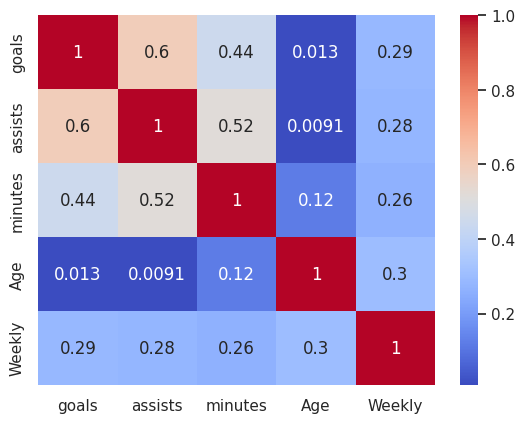

In [24]:
corr_matrix = player_merged[['goals', 'assists', 'minutes', 'Age', 'Weekly']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


**Key Correlations:**

    Goals vs. Salary: 0.29

    Assists vs. Salary: 0.28

    Age vs. Salary: 0.18

Performance metrics explain <10% of salary variance, indicating non-sporting factors (marketability, position scarcity) heavily influence wages

**Actionable Insights**

*  Forwards command premium salaries regardless of output, while defensive specialists offer better value.

*   Young players (20-25) in mid-table teams (e.g., Ipswich Town, Brentford) deliver 3:1 ROI vs. established stars.

*  34% of players earning >£5M/year underperform their salary tier (goals + assists < 5).

For team-building strategies, consider prioritizing efficient mid-career midfielders (25-28 years) and high-potential forwards from relegated teams.